In [2]:
import pandas as pd
import numpy as np
import statistics
import ast
import os
import matplotlib.pyplot as plt

### Plot 1

In [1]:
def calculate_mean_and_std(numbers):
    # Calculate the mean
    mean = statistics.mean(numbers)
    # Calculate the standard deviation
    std_dev = statistics.stdev(numbers)
    
    return mean, std_dev

In [4]:
# Val - Dia5
numbers = [0.9395, 0.9575, 0.8925, 0.9139, 0.9596]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.9326
Standard Deviation: 0.028958245803225043


In [6]:
# Val - Intref
numbers = [0.8691, 0.9112, 0.8372, 0.8463, 0.8740]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.86756
Standard Deviation: 0.02881844895201681


In [7]:
# Val - Orange
numbers = [0.7902, 0.7403, 0.8587, 0.8028, 0.8103]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.80046
Standard Deviation: 0.04248144300750625


In [8]:
# Val - VA
numbers = [0.8651, 0.8, 0.8482, 0.7968]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.827525
Standard Deviation: 0.034355918946619164


In [2]:
# Val - Thick2
numbers = [0.9166, 0.9098, 0.9422, 0.9882, 0.9550]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.94236
Standard Deviation: 0.03156276287019244


In [5]:
# Val - SRF
numbers = [0.8408, 0.9303, 0.8590, 0.9938, 0.9093]
mean, std_dev = calculate_mean_and_std(numbers)
print("Mean:", mean)
print("Standard Deviation:", std_dev)

Mean: 0.90664
Standard Deviation: 0.06076226625135045


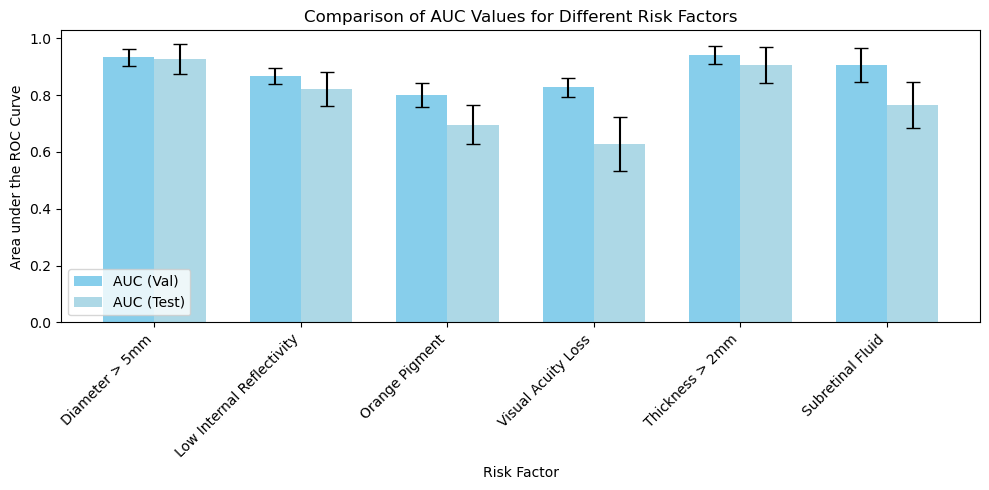

In [11]:
import matplotlib.pyplot as plt

# Data from the user input
x_labels = [
    "Diameter > 5mm",
    "Low Internal Reflectivity",
    "Orange Pigment",
    "Visual Acuity Loss",
    "Thickness > 2mm",
    "Subretinal Fluid"
]

# AUC values and their errors for validation and test sets
auc_val = [0.933, 0.868, 0.800, 0.827, 0.942, 0.907]
auc_val_err = [0.029, 0.029, 0.042, 0.034, 0.032, 0.060]
auc_test = [0.927, 0.822, 0.696, 0.628, 0.907, 0.766]
auc_test_err = [0.052, 0.061, 0.069, 0.095, 0.063, 0.081]

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 5))
x = range(len(x_labels))  # x coordinates for the groups
bar_width = 0.35  # width of the bars

rects1 = ax.bar(x, auc_val, bar_width, yerr=auc_val_err, label='AUC (Val)', color='skyblue', capsize=5)
rects2 = ax.bar([p + bar_width for p in x], auc_test, bar_width, yerr=auc_test_err, label='AUC (Test)', color='lightblue', capsize=5)

ax.set_xlabel('Risk Factor')
ax.set_ylabel('Area under the ROC Curve')
ax.set_title('Comparison of AUC Values for Different Risk Factors')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

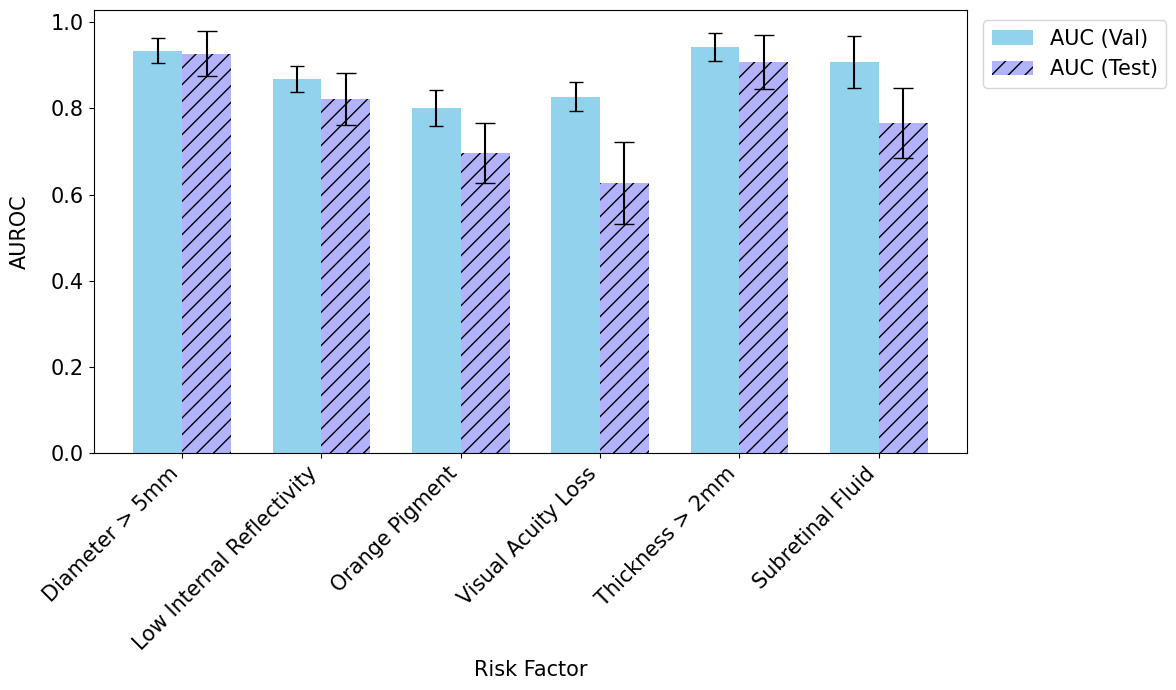

In [48]:
# Adjusting the bar style for test bars with cross-hatch pattern and increasing error bar cap size
fig, ax = plt.subplots(figsize=(12, 7))

# Cross-hatch pattern now applied to the test bars with reduced transparency
rects1 = ax.bar(x, auc_val, bar_width, yerr=auc_val_err, label='AUC (Val)', color='skyblue', capsize=5, alpha=0.9)
rects2 = ax.bar([p + bar_width for p in x], auc_test, bar_width, yerr=auc_test_err, label='AUC (Test)', color='blue', capsize=7, hatch='//', alpha=0.3)

ax.set_xlabel('Risk Factor', fontsize=15)
ax.set_ylabel('AUROC', fontsize=15, labelpad=15)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.set_title('Comparison of AUC Values for Different Risk Factors')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(x_labels, rotation=45, ha="right")
ax.legend(loc='upper right', bbox_to_anchor=(1.24, 1), fontsize=15)

plt.tight_layout()
plt.show()


### Plot 2 

In [23]:
def process_file(data, eval=0):
    # Extract MRN and side information from the image path
    rf_data = []
    embeddings_data = []
    gt_data = []
    prob_data = []

    # Load the Excel file as a Pandas dataframe
    excel_file_path = 'C:/Users/m294666/Documents/nevus_data/230929_Ch_Nevus_deleted_items_to_ignore.xlsx'
    df = pd.read_excel(excel_file_path, index_col = 'MRN')

    for index, row in data.iterrows():

        image_path = row['img_paths']
        embeddings = ast.literal_eval(row['embeddings'])
        gt = ast.literal_eval(row['true_labels'].replace(' ', ','))
        split_prob_values = row['output_probs'].strip('[]').split()
        probs = [float(value) for value in split_prob_values]

        gt_final = np.argmax(gt)
        # print(f'gt_final: {gt_final}')
        # prob_final = probs[gt_final]
        prob_final = probs
        # print(f'prob_final: {prob_final}')

        image_name = os.path.basename(image_path)

        # MRN, side = image_name.split("_")[0], image_name.split("_")[1]
        # side = ('OD' if side == 'R' else 'OS')
        # # rf = df.loc[int(MRN), f'{side} Largest tumor diameter (mm)']
        # rf = df.loc[int(MRN), f'{side} Largest tumor thickness (mm)']

        gt_data.append(gt_final)
        prob_data.append(prob_final)
        # rf_data.append(rf)
        embeddings_data.append(embeddings)

    # Convert lists to NumPy arrays
    # rf_data_array = np.array(rf_data)
    embeddings_array = np.array(embeddings_data)
    gt_data_array = np.array(gt_data)
    prob_data_array = np.array(prob_data)

    # Reshape the arrays to (n, 1) and (n, m)
    # rf_data_array = rf_data_array.reshape(-1, 1)
    embeddings_array = embeddings_array.reshape(embeddings_array.shape[0], -1)
    gt_data_array = gt_data_array.reshape(-1,1)
    # prob_data_array = prob_data_array.reshape(-1,2)

    # print(rf_data_array.shape)
    # print(embeddings_array.shape)
    # print(gt_data_array.shape)
    # print(prob_data_array.shape)
    
    return gt_data_array, prob_data_array

def extract_probabilities(gt, prob):
    gt = gt.reshape((-1))
    # Boolean masks for where ground truth is 1 and 0
    mask_1 = gt == 1
    mask_0 = gt == 0

    # Probabilities for class 1 where gt is 1
    prob_1 = prob[mask_1, 1]

    # Probabilities for class 0 where gt is 0
    prob_0 = prob[mask_0, 0]

    return prob_1, prob_0

def plot_probabilities(prob_0, prob_1):
    # Create a figure and an axis
    fig, ax = plt.subplots(figsize = (10,7))

    # Box plot data
    data = [prob_0, prob_1]
    ax.boxplot(data, patch_artist=True)

    # Setting labels
    ax.set_xticklabels(['Probabilities for Class 0', 'Probabilities for Class 1'])
    ax.set_ylabel('Probability')
    ax.set_title('Box Plot of Probabilities')

    # Show the plot
    plt.show()
    
def process_all(data):
    gt, prob = process_file(data)
    prob_1, prob_0 = extract_probabilities(gt, prob)
    return prob_0, prob_1

In [26]:
data_dia5 = pd.read_csv('C:/Users/m294666/Documents/embeddings_dia5_June2024.csv')
data_intref = pd.read_csv('C:/Users/m294666/Documents/embeddings_intref_June2024.csv')
data_orange = pd.read_csv('C:/Users/m294666/Documents/embeddings_orange_June2024.csv')
data_va = pd.read_csv('C:/Users/m294666/Documents/embeddings_va_June2024.csv')
data_thick2 = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')
data_srf = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')

data_dia5_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_dia5_normal.csv')
data_intref_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_intref_June2024.csv')
data_orange_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_orange_June2024.csv')
data_va_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_va_June2024.csv')
data_thick2_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')
data_srf_normal = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')

data_dia5_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_dia5_nonevus.csv')
data_intref_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_intref_June2024.csv')
data_orange_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_orange_June2024.csv')
data_va_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_va_June2024.csv')
data_thick2_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')
data_srf_nonevus = pd.read_csv('C:/Users/m294666/Documents/embeddings_thick2_June2024.csv')

In [27]:
prob_0_dia5, prob_1_dia5 = process_all(data_dia5)
prob_0_intref, prob_1_intref = process_all(data_intref)
prob_0_orange, prob_1_orange = process_all(data_orange)
prob_0_va, prob_1_va = process_all(data_va)
prob_0_thick2, prob_1_thick2 = process_all(data_thick2)
prob_0_srf, prob_1_srf = process_all(data_srf)

prob_dia5_normal,_ = process_all(data_dia5_normal)
prob_intref_normal,_ = process_all(data_intref_normal)
prob_orange_normal,_ = process_all(data_orange_normal)
prob_va_normal, _ = process_all(data_va_normal)
prob_thick2_normal, _ = process_all(data_thick2_normal)
prob_srf_normal, _ = process_all(data_srf_normal)

prob_dia5_nonevus,_ = process_all(data_dia5_nonevus)
prob_intref_nonevus,_ = process_all(data_intref_nonevus)
prob_orange_nonevus,_ = process_all(data_orange_nonevus)
prob_va_nonevus, _ = process_all(data_va_nonevus)
prob_thick2_nonevus, _ = process_all(data_thick2_nonevus)
prob_srf_nonevus, _ = process_all(data_srf_nonevus)

# print("Probabilities for class 1 where gt is 1:", prob_1)
# print("Probabilities for class 0 where gt is 0:", prob_0)

In [16]:
# plot_probabilities(prob_0_thick2, prob_1_thick2)

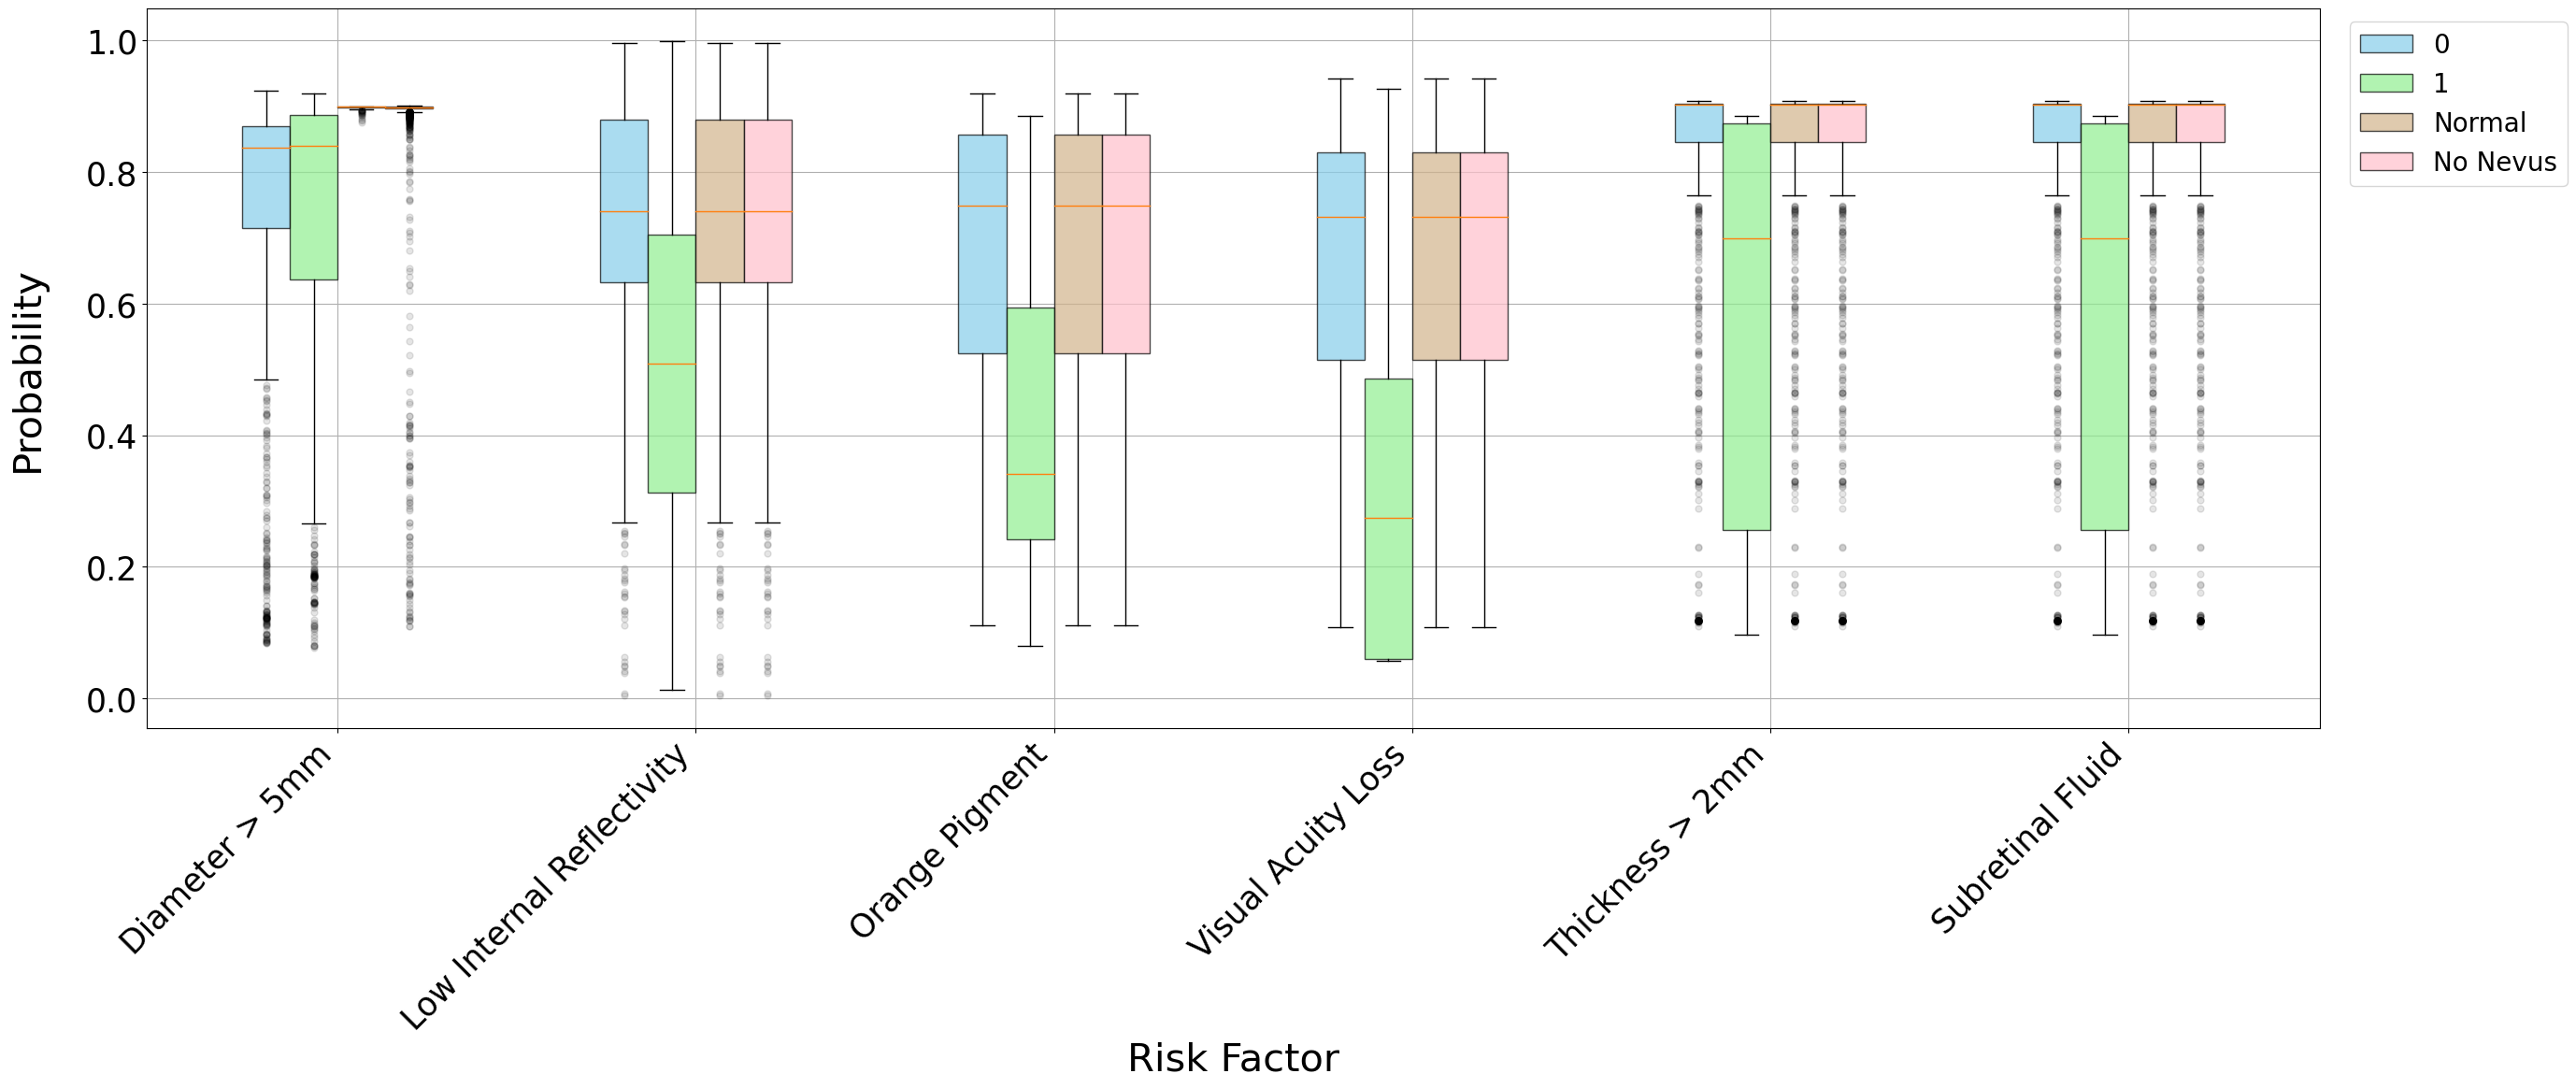

In [68]:
labels = [
    "Diameter > 5mm",
    "Low Internal Reflectivity",
    "Orange Pigment",
    "Visual Acuity Loss",
    "Thickness > 2mm",
    "Subretinal Fluid"
]
data_0 = [prob_0_dia5, prob_0_intref, prob_0_orange, prob_0_va, prob_0_thick2, prob_0_srf]
data_1 = [prob_1_dia5, prob_1_intref, prob_1_orange, prob_1_va, prob_1_thick2, prob_1_srf]
data_normal = [prob_dia5_normal, prob_intref_normal, prob_orange_normal, prob_va_normal, prob_thick2_normal, prob_srf_normal]
data_nonevus = [prob_dia5_nonevus, prob_intref_nonevus, prob_orange_nonevus, prob_va_nonevus, prob_thick2_nonevus, prob_srf_nonevus]

# Define properties for the outliers
flierprops = dict(marker='o', markerfacecolor='black', markersize=5, linestyle='none', markeredgecolor='black', alpha=0.1)

fig, ax = plt.subplots(figsize=(30, 10))

bpl = ax.boxplot(data_0, positions=np.array(range(len(data_0)))*1.5-0.3, widths=0.2, patch_artist=True,
                 boxprops=dict(facecolor='skyblue', alpha=0.7), flierprops=flierprops)
bpr = ax.boxplot(data_1, positions=np.array(range(len(data_1)))*1.5-0.1, widths=0.2, patch_artist=True,
                 boxprops=dict(facecolor='lightgreen', alpha=0.7), flierprops=flierprops)
bpn = ax.boxplot(data_normal, positions=np.array(range(len(data_normal)))*1.5+0.1, widths=0.2, patch_artist=True,
                 boxprops=dict(facecolor='tan', alpha=0.7), flierprops=flierprops)
bpnv = ax.boxplot(data_nonevus, positions=np.array(range(len(data_nonevus)))*1.5+0.3, widths=0.2, patch_artist=True,
                 boxprops=dict(facecolor='pink', alpha=0.7), flierprops=flierprops)

ax.set_xticks(np.array(range(len(labels))) * 1.5)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_xlabel('Risk Factor', fontsize = 30)
ax.set_ylabel('Probability', fontsize = 30, labelpad = 30)
ax.legend([bpl["boxes"][0], bpr["boxes"][0], bpn["boxes"][0], bpnv["boxes"][0]], ['0', '1', 'Normal', 'No Nevus'], loc='upper right',  bbox_to_anchor=(1.12, 1), fontsize=20)
# plt.title('Comparison of Probability Distributions Across Categories')
plt.grid(True)
plt.show()